<a href="https://colab.research.google.com/github/blah-bleh-hmm/housing-price-predictor/blob/main/house_pricing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/california-housing-prices


In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
train_data = x_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17104,-122.23,37.45,29.0,1617.0,235.0,758.0,246.0,7.7932,NEAR OCEAN,469900.0
6374,-118.02,34.17,32.0,3868.0,548.0,1558.0,528.0,9.4667,INLAND,500001.0
8707,-118.34,33.83,35.0,1818.0,353.0,853.0,321.0,5.8972,<1H OCEAN,350900.0
20020,-119.04,36.07,17.0,2623.0,659.0,1912.0,618.0,1.5893,INLAND,52000.0
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,NEAR BAY,500001.0
...,...,...,...,...,...,...,...,...,...,...
11398,-117.95,33.72,21.0,3107.0,483.0,1688.0,503.0,5.9582,<1H OCEAN,288000.0
18543,-122.03,36.97,36.0,337.0,69.0,223.0,68.0,3.2404,NEAR OCEAN,225000.0
17776,-121.84,37.38,34.0,762.0,182.0,611.0,193.0,3.5625,<1H OCEAN,201800.0
15833,-122.44,37.75,52.0,3114.0,637.0,1144.0,591.0,4.0000,NEAR BAY,375000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

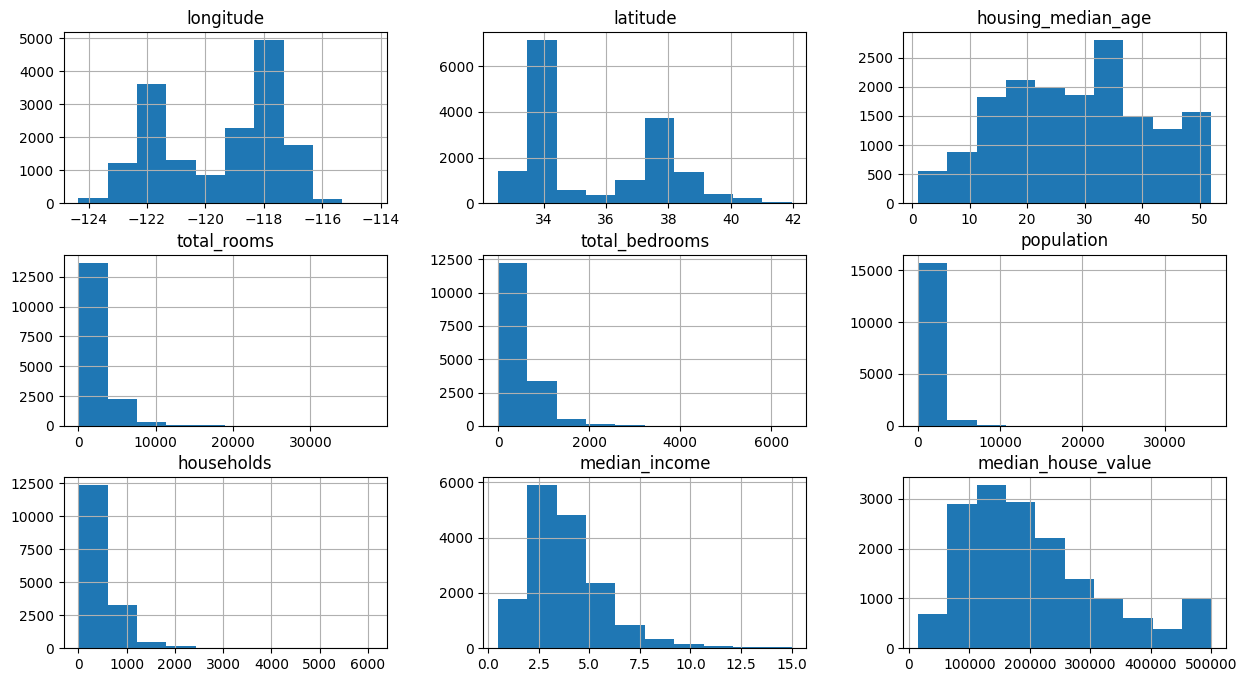

In [ ]:
train_data.hist(figsize=(15,8))

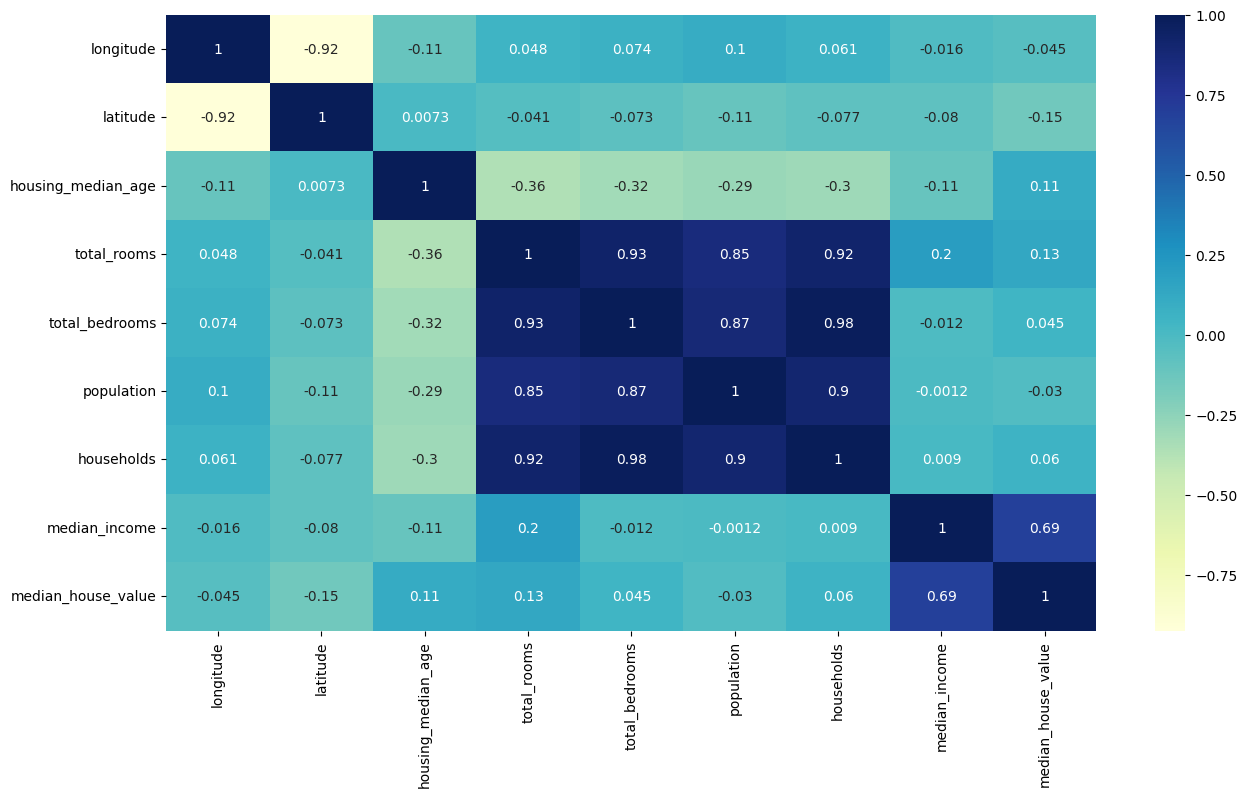

In [ ]:
plt.figure(figsize=(15, 8))

numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.show()


In [ ]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['total_bedrooms']+1)
train_data['households']=np.log(train_data['households']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

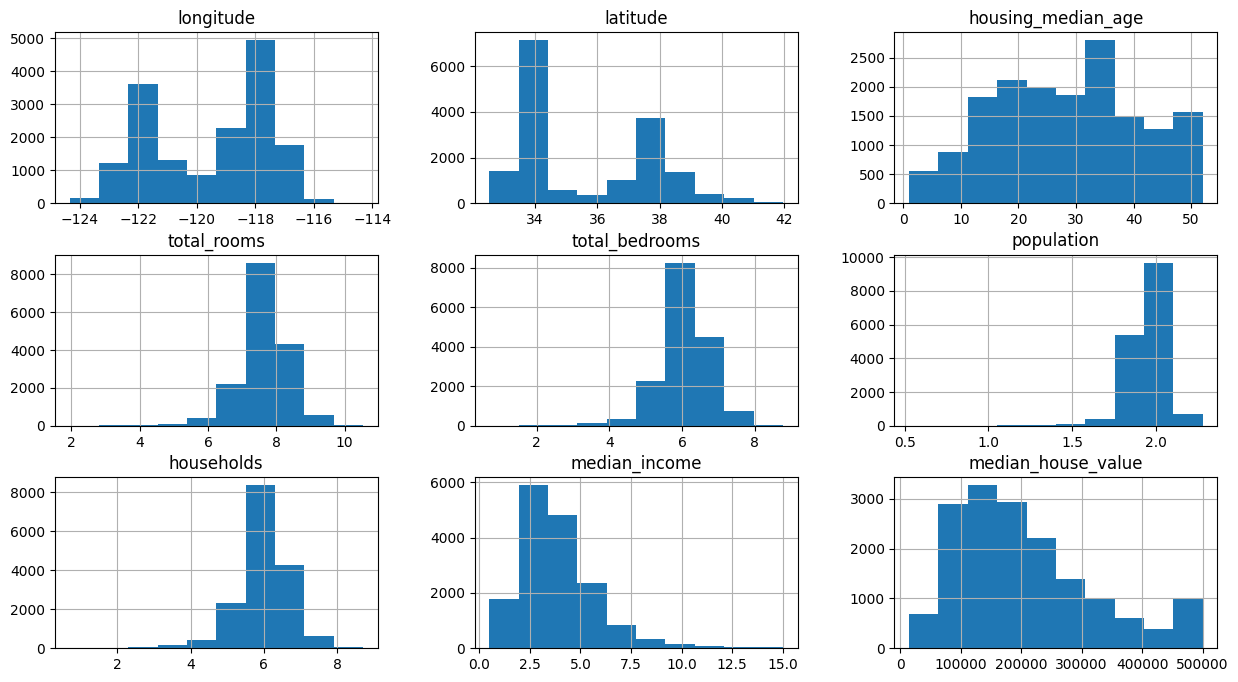

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17104,-122.23,37.45,29.0,7.388946,5.463832,1.866222,5.509388,7.7932,469900.0,False,False,False,False,True
6374,-118.02,34.17,32.0,8.260751,6.308098,1.988983,6.270988,9.4667,500001.0,False,True,False,False,False
8707,-118.34,33.83,35.0,7.506042,5.869297,1.927062,5.774552,5.8972,350900.0,True,False,False,False,False
20020,-119.04,36.07,17.0,7.872455,6.492240,2.013868,6.428105,1.5893,52000.0,False,True,False,False,False
494,-122.24,37.85,52.0,8.223359,6.163315,1.968973,6.208590,9.3959,500001.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11398,-117.95,33.72,21.0,8.041735,6.182085,1.971590,6.222576,5.9582,288000.0,True,False,False,False,False
18543,-122.03,36.97,36.0,5.823046,4.248495,1.657941,4.234107,3.2404,225000.0,False,False,False,False,True
17776,-121.84,37.38,34.0,6.637258,5.209486,1.826078,5.267858,3.5625,201800.0,True,False,False,False,False
15833,-122.44,37.75,52.0,8.043984,6.458338,2.009333,6.383507,4.0000,375000.0,False,False,False,True,False


<Axes: >

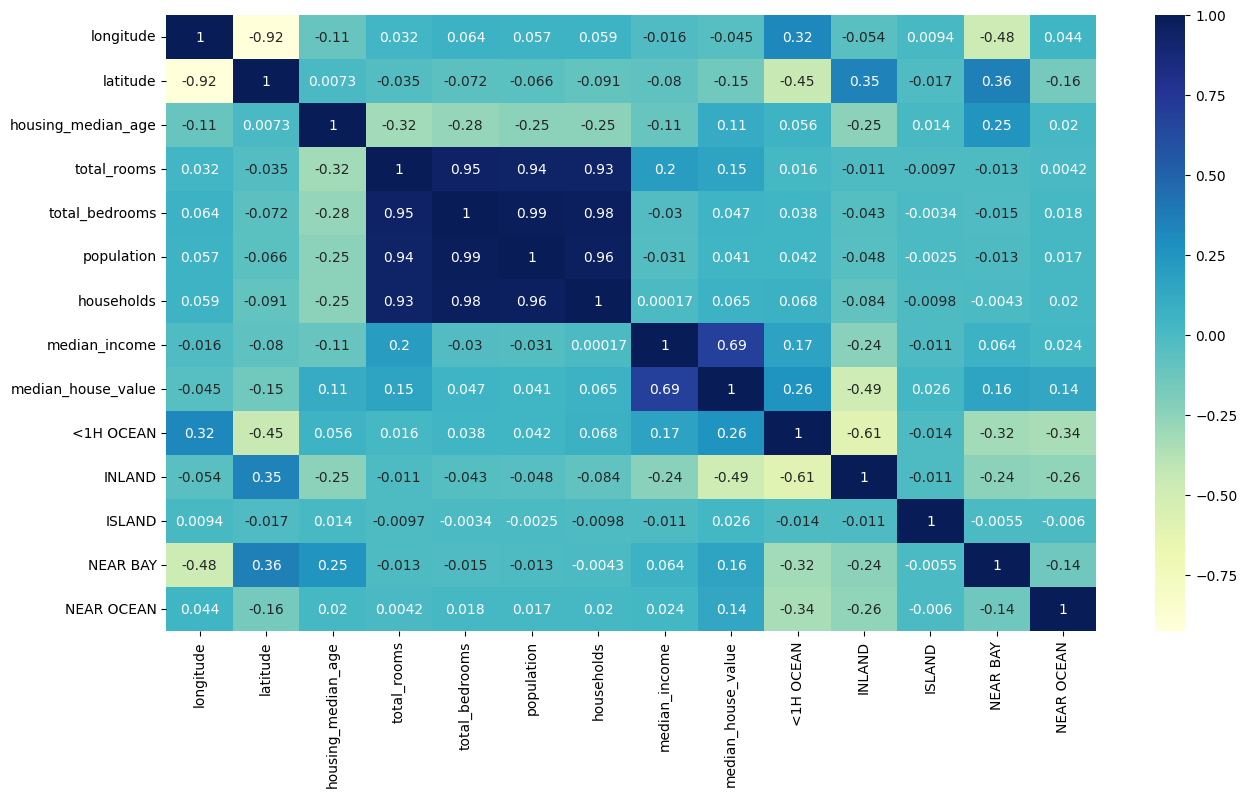

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: xlabel='latitude', ylabel='longitude'>

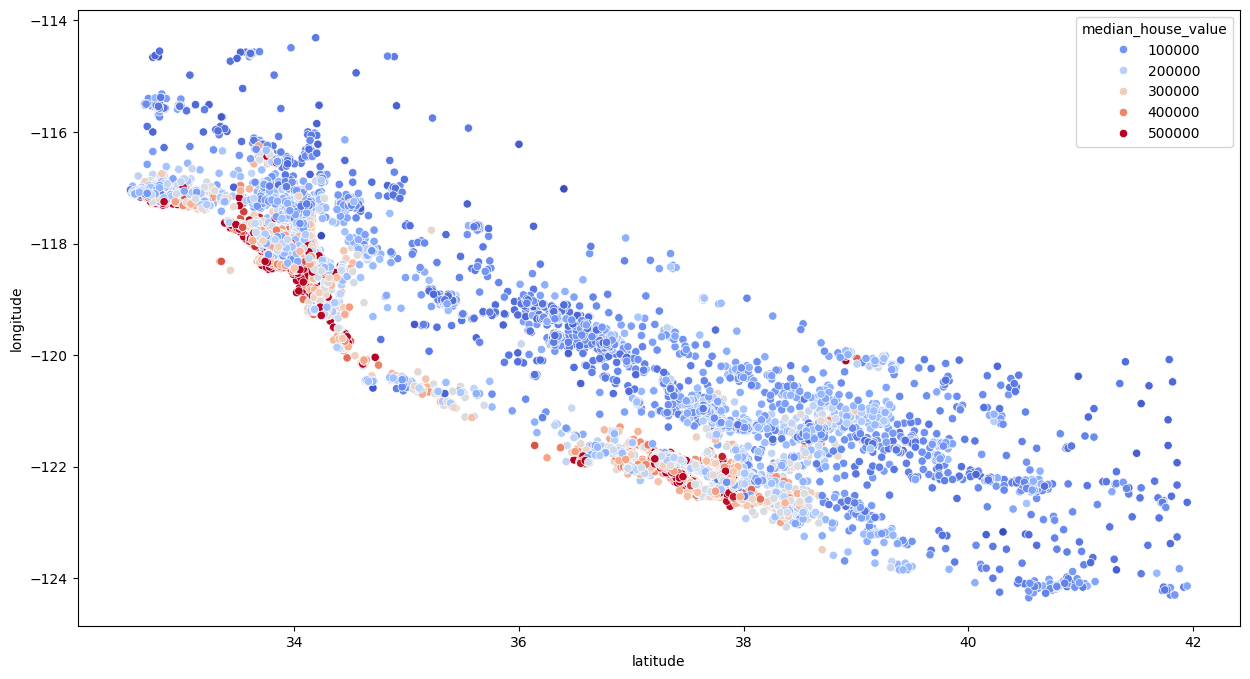

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [ ]:
train_data['bedroom_ratio']= train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms']/train_data['households']


<Axes: >

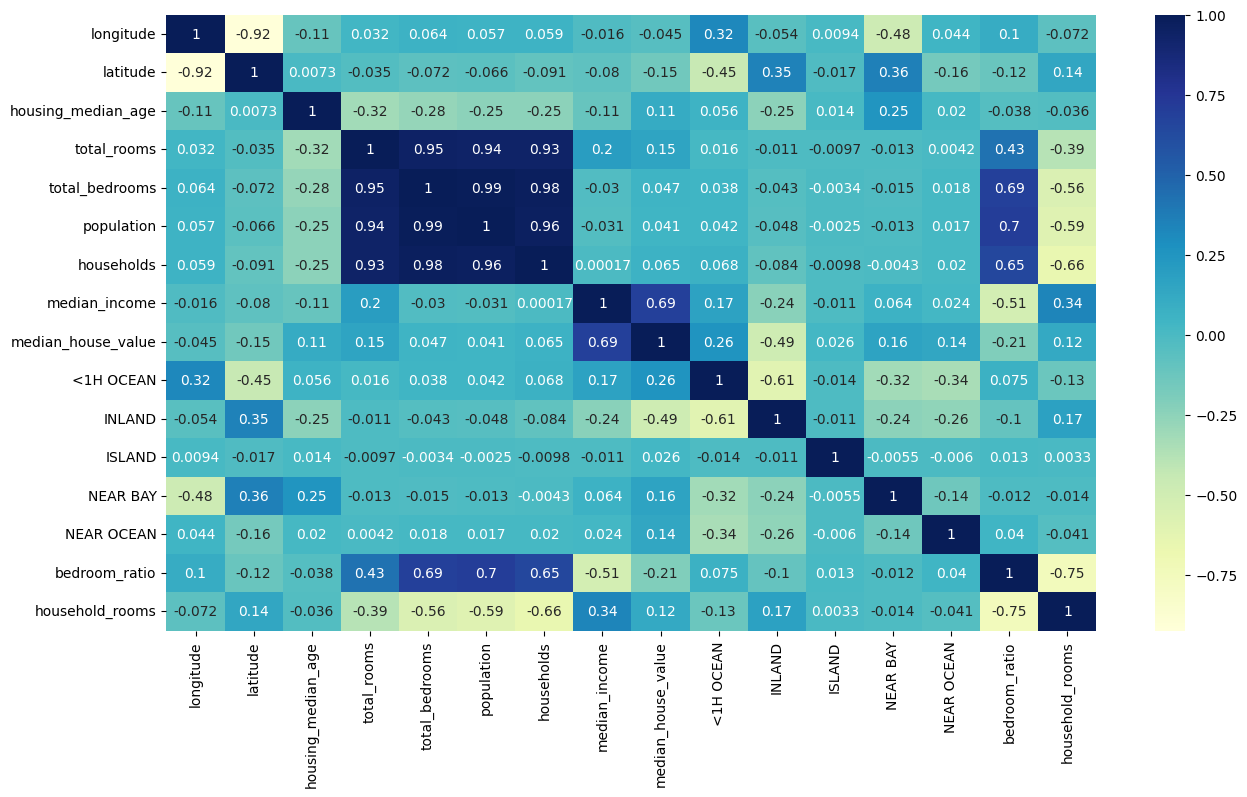

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg= LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [ ]:
test_data = x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['total_bedrooms']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio']= test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']= test_data['total_rooms']/test_data['households']



In [ ]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [ ]:
x_test_s = scaler.transform(x_test)

In [ ]:
reg.score(x_test_s,y_test)

0.6291428402336474

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [ ]:
forest.score(x_test_s, y_test)

0.810444348429738

In [ ]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()

param_grid ={
    "n_estimators": [30, 50,100],
    "max_features":[8,12,20],
    "min_samples_split":[2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(x_test_s, y_test)

0.804755950166576

<Axes: >

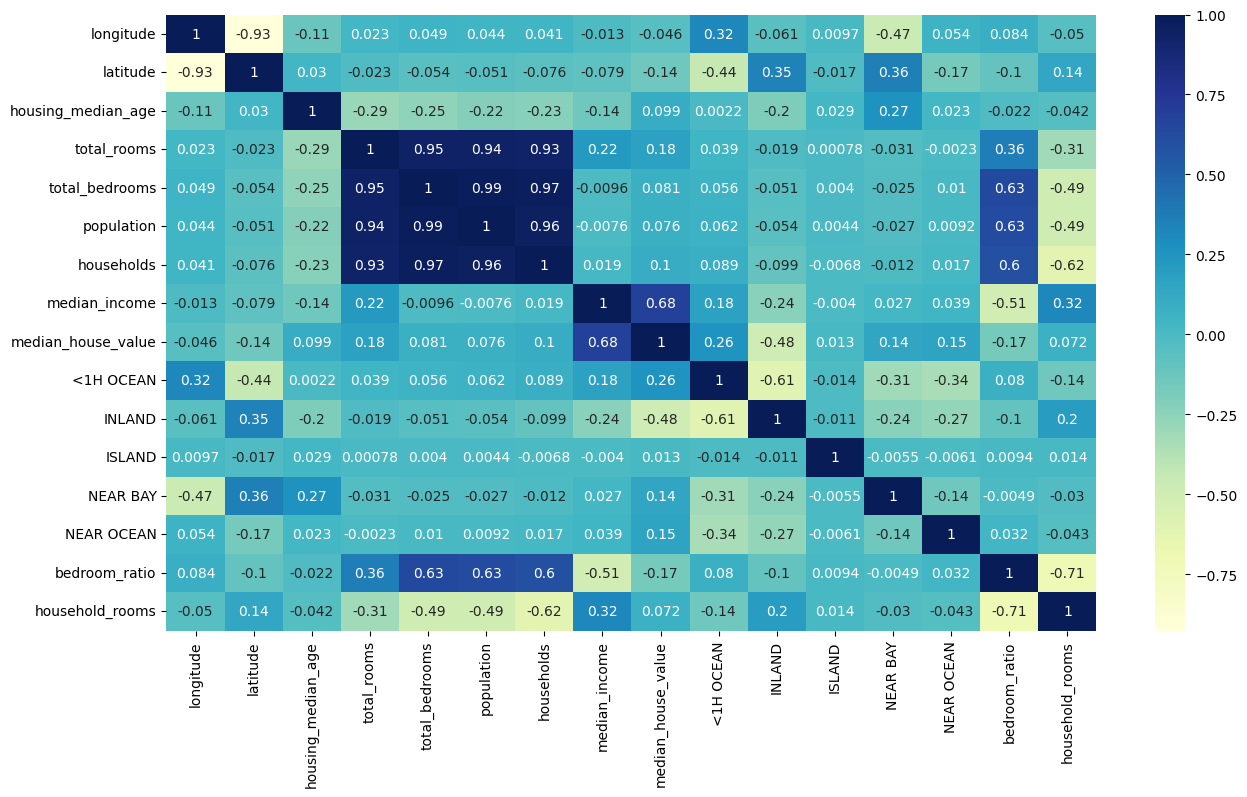

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(test_data.corr(), annot=True, cmap="YlGnBu")
